D:\anaconda3\anaconda3_install\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


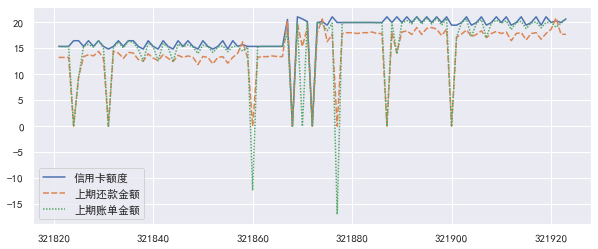

D:\anaconda3\anaconda3_install\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\anaconda3\anaconda3_install\lib\tkinter\__init__.py", line 1699, in __call__
    return self.func(*args)
  File "<ipython-input-71-8c01a525ea8f>", line 149, in bank
    ax1 = sns.barplot(x=x1, y=y1)
  File "D:\anaconda3\anaconda3_install\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "D:\anaconda3\anaconda3_install\lib\site-packages\seaborn\categorical.py", line 3182, in barplot
    errcolor, errwidth, capsize, dodge)
  File "D:\anaconda3\anaconda3_install\lib\site-packages\seaborn\categorical.py", line 1586, in __init__
    self.establish_col

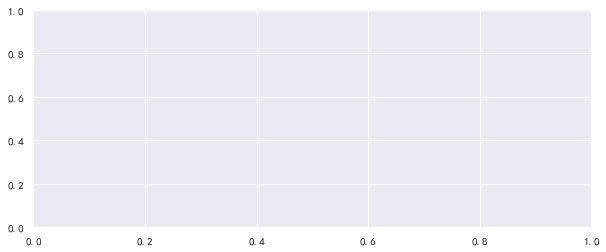

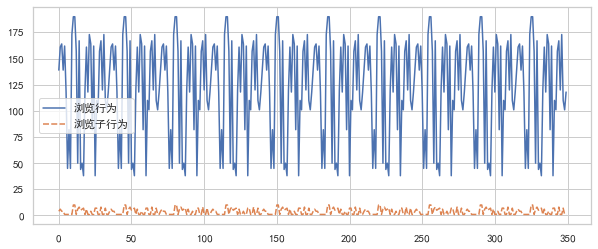

In [71]:
import tkinter as tk
import tkinter.messagebox
from tkinter import *
from PIL import Image, ImageTk
import pickle
from tkinter import ttk
import math
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#用来正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
#作图使用
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid", {"font.sans-serif":["simhei", "Arial"]})
# from PIL import Image
# from PIL import ImageTk
# from tkinter import *
#创建一个窗口
window = tk.Tk()
window.title("信贷风险预测模型结果查询及分析")
window.geometry('1020x700')

#画布放置图片
canvas = tk.Canvas(window, height=700, width=1020)
imagefile=tk.PhotoImage(file='D:/Desktop/111.gif')
image = canvas.create_image(0, 0, anchor='nw', image=imagefile)
canvas.pack(side='top')

#用户ID和选取的模型
tk.Label(window, text="用户ID：",width=10,height=2, 
         font=("宋体", 15), 
        background="#66B3FF").place(x=300, y=300)
tk.Label(window, text="选取模型：",width=10,height=2, 
        font=("宋体", 15),
        background="#66B3FF").place(x=300, y=380)
#用户ID输入框
var_user_id = tk.IntVar()
entry_user_id = tk.Entry(window, textvariable=var_user_id, font="Helvetica 20 bold", bd=0)
entry_user_id.place(x=450, y=300, width=150, height=40)

#选择模型下拉框
model = tk.StringVar()
select_model = ttk.Combobox(window, width=13, font=10, height=200, textvariable=model)
select_model.place(x=450, y=390)
# select_model.pack()
#设置添加数据
select_model["value"]=("GA-XGBoost","XGBoost","GA-LightGBM","GA-GBDT", "GA-RF", "BP", "SVM")
select_model.current(0)

#读取数据
fileName_data = open(r'D:/Python/毕设实验部分/data/临时特征集/alogImprove_log_test_proba_xgb_gbdt_lgb_rf_bp_svm_1.csv')
result_test = pd.read_csv(fileName_data)

#信用卡账单记录表
def bill():
    def search_id():
        user_id = var_user_id.get()
        model_1 = select_model.get()
        return user_id, model_1
    user_id, model_1 = search_id()
    fileName_bill = open(r'D:/Python/毕设实验部分/data/datatset/datatset/train/train/bill_detail_train.txt')
    bill_data = pd.read_csv(fileName_bill, header=None, 
                       names=["用户标识", "时间", "银行标识", "上期账单金额", "上期还款金额", "信用卡额度",
                             "本期账单余额", "本期账单最低还款额", "消费笔数", "本期账单金额", "调整金额",
                             "循环利息", "可用余额", "预借现金额度", "还款状态"])
    window_bill=tk.Toplevel(window)
    window_bill.title("信用卡账单分析")
    window_bill.geometry('1020x700')
    canvas_1 = tk.Canvas(window_bill, height=700, width=1020)
    imagefile_1=tk.PhotoImage(file='D:/Desktop/111.gif')
    image = canvas_1.create_image(0, 0, anchor='nw', image=imagefile_1)
    canvas_1.pack(side='top')
    text_user = "用户ID："+ str(user_id)
    tk.Label(window_bill, text=text_user,width=22,height=2, 
             font=("宋体", 12),
            background="#cccccc").place(x=100, y=100)
    text_model = "选取的模型：" + model_1
    tk.Label(window_bill, text=text_model,width=22,height=2, 
            font=("宋体", 12),
            background="#cccccc").place(x=100, y=150)
    temp = bill_data[bill_data["用户标识"] == user_id]
    temp["信用卡额度"].fillna(temp["信用卡额度"].mean(), inplace=True)
    temp["上期还款金额"].fillna(temp["上期还款金额"].mean(), inplace=True)
    temp["上期账单金额"].fillna(temp["上期账单金额"].mean(), inplace=True)
    temp["本期账单余额"].fillna(temp["本期账单余额"].mean(), inplace=True)
    plt.rcParams['axes.unicode_minus']=False 
    plt.rcParams['figure.figsize'] = (10, 4)
    dd=[temp['信用卡额度'],temp['上期还款金额'], temp["上期账单金额"]]
    ax = sns.lineplot(data=dd)
    plt.savefig(r"D:/Graduation Design/论文2.0图片/temp", dpi=100, bbox_inches='tight')
    plt.show()
    img = Image.open('D:/Graduation Design/论文2.0图片/temp.png')  # 打开图片
    photo = ImageTk.PhotoImage(img)  # 用PIL模块的PhotoImage打开
    imglabel = Label(window_bill, image=photo, width=850, height=343).place(x=100, y=200)
    window_bill.mainloop()
    
#银行卡账单记录表
def bank():
    def search_id():
        user_id = var_user_id.get()
        model_1 = select_model.get()
        return user_id, model_1
    user_id, model_1 = search_id()
    fileName_bankTrain = open(r'D:/Python/毕设实验部分/data/datatset/datatset/train/train/bank_detail_train.txt')
    bank_data = pd.read_csv(fileName_bankTrain).rename(index=str, columns={"uid":"用户标识", "timespan":"流水时间", "type":"交易类型",
                                                                     "amount":"交易金额", "markup":"工资收入标记"})
    window_bank=tk.Toplevel(window)
    window_bank.title("银行卡记录分析")
    window_bank.geometry('1020x700')
    canvas_1 = tk.Canvas(window_bank, height=700, width=1020)
    imagefile_1=tk.PhotoImage(file='D:/Desktop/111.gif')
    image = canvas_1.create_image(0, 0, anchor='nw', image=imagefile_1)
    canvas_1.pack(side='top')
    text_user = "用户ID："+ str(user_id)
    tk.Label(window_bank, text=text_user,width=22,height=2, 
             font=("宋体", 12),
            background="#cccccc").place(x=100, y=100)
    text_model = "选取的模型：" + model_1
    tk.Label(window_bank, text=text_model,width=22,height=2, 
            font=("宋体", 12),
            background="#cccccc").place(x=100, y=150)
    temp = bank_data[bank_data["用户标识"] == user_id]
    temp["交易金额"].fillna(temp["交易金额"].mean(), inplace=True)
    plt.rcParams['axes.unicode_minus']=False 
    if len(bank_data[bank_data["用户标识"] == user_id] > 20):
        x1 = [i for i in range(1, 21, 1)]
        x2 = [i for i in range(0, 20, 1)]
        y1 = bank_data[bank_data["用户标识"] == user_id]["交易金额"].tolist()[:20]
        y2 = bank_data[bank_data["用户标识"] == user_id]["交易金额"].tolist()[:20]
    else:
        x1 = [i for i in range(1, len(bank_data[bank_data["用户标识"] == user_id])+1)]
        x2 = [i for i in range(0, len(bank_data[bank_data["用户标识"] == user_id]), 1)]
        y1 = bank_data[bank_data["用户标识"] == user_id]["交易金额"].tolist()
        y2 = bank_data[bank_data["用户标识"] == user_id]["交易金额"].tolist()

    # 设置图形大小
    plt.rcParams['figure.figsize'] = (10, 4)
    fig = plt.figure()
    # 画柱形图
    ax1 = fig.add_subplot(111)
#     ax1.set_ylim([0, 25])
    # ax1.bar(x, y1, alpha=0.7, color='k')
    ax1 = sns.barplot(x=x1, y=y1)
    ax1.set_ylabel(u'交易金额', fontsize='8')
    ax1.set_xlabel(u'消费编号', fontsize='8')
    ax1.tick_params(labelsize=8)
    # 画折线图
    ax2 = ax1.twinx()  # 组合图必须加这个
    ax2.set_ylim([0, 25])      
    ax2.plot(x2, y2, 'r', ms=5, lw=2, marker='o') # 设置线粗细，节点样式
    ax2.tick_params(labelsize=8)

    plt.savefig(r"D:/Graduation Design/论文2.0图片/temp", dpi=100, bbox_inches='tight')
    plt.show()
    img = Image.open('D:/Graduation Design/论文2.0图片/temp.png')  # 打开图片
    photo = ImageTk.PhotoImage(img)  # 用PIL模块的PhotoImage打开
    imglabel = Label(window_bank, image=photo, width=850, height=343).place(x=100, y=200)
    window_bank.mainloop()
    
#用户浏览行为记录表
def behaviour():
    def search_id():
        user_id = var_user_id.get()
        model_1 = select_model.get()
        return user_id, model_1
    user_id, model_1 = search_id()
    fileName_browseTrain = open(r'D:/Python/毕设实验部分/data/datatset/datatset/train/train/browse_history_train.txt')
    beh_data = pd.read_csv(fileName_browseTrain, header=None, 
                       names=["用户标识", "浏览时间", "浏览行为数据", "浏览子行为编号"])
    window_beh=tk.Toplevel(window)
    window_beh.title("用户浏览行为分析")
    window_beh.geometry('1020x700')
    canvas_1 = tk.Canvas(window_beh, height=700, width=1020)
    imagefile_1=tk.PhotoImage(file='D:/Desktop/111.gif')
    image = canvas_1.create_image(0, 0, anchor='nw', image=imagefile_1)
    canvas_1.pack(side='top')
    text_user = "用户ID："+ str(user_id)
    tk.Label(window_beh, text=text_user,width=22,height=2, 
             font=("宋体", 12),
            background="#cccccc").place(x=100, y=100)
    text_model = "选取的模型：" + model_1
    tk.Label(window_beh, text=text_model,width=22,height=2, 
            font=("宋体", 12),
            background="#cccccc").place(x=100, y=150)
    temp = beh_data[beh_data["用户标识"] == user_id]
    temp["浏览行为数据"].fillna(temp["浏览行为数据"].mean(), inplace=True)
    temp["浏览子行为编号"].fillna(temp["浏览子行为编号"].mean(), inplace=True)
    plt.rcParams['axes.unicode_minus']=False 
    x = beh_data[beh_data["用户标识"] == user_id]["浏览行为数据"]
    y = beh_data[beh_data["用户标识"] == user_id]["浏览子行为编号"]
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = (10, 4)
#     # 画柱形图
#     ax1 = fig.add_subplot(121)# ax1.set_ylim([0, 0.02])
#     sns.distplot(x)
#     ax1.set_xlabel("浏览行为数据", fontsize=8)
#     ax1.set_ylabel("Density", fontsize=8)
# #     ax1.set_title("（a）浏览行为分布", fontsize=10, y=-0.18)
#     ax2 = fig.add_subplot(122) 
#     sns.violinplot(x=y)
#     ax2.set_xlabel("浏览行为数据", fontsize=8)
#     ax2.set_title("（b）浏览行为分布", fontsize=10, y=-0.18)
    # plt.savefig(r"D:/Graduation Design/论文2.0图片/系统_浏览行为", dpi=600, bbox_inches='tight')
    sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']}) 
    df = pd.DataFrame()
    df["浏览行为"] = x.tolist()
    df["浏览子行为"] = y.tolist()
    sns.lineplot(data=df)
    plt.savefig(r"D:/Graduation Design/论文2.0图片/temp", dpi=100, bbox_inches='tight')
    plt.show()
    img = Image.open('D:/Graduation Design/论文2.0图片/temp.png')  # 打开图片
    photo = ImageTk.PhotoImage(img)  # 用PIL模块的PhotoImage打开
    imglabel = Label(window_beh, image=photo, width=850, height=343).place(x=100, y=200)
    window_beh.mainloop()
    
    
#查询函数
def search():
    def search_res():
    #获取用户ID和选择的模型
        user_id = var_user_id.get()
        model_1 = select_model.get()
#         print(model_1)
        user_data = result_test[result_test["用户标识"]==user_id].iloc[0:1, :]
        proba = float(user_data[model_1])
        return user_id, model_1, proba
    #新建结果展示界面
    user_id, model_1, proba = search_res()
#     print(proba)
    window_result=tk.Toplevel(window)
    window_result.title("信贷风险预测模型结果查询")
    window_result.geometry('1020x700')
    canvas_1 = tk.Canvas(window_result, height=700, width=1020)
    imagefile_1=tk.PhotoImage(file='D:/Desktop/111.gif')
    image = canvas_1.create_image(0, 0, anchor='nw', image=imagefile_1)
    canvas_1.pack(side='top')
    #用户ID和选取的模型，是否违约以及违约概率
    tk.Label(window_result, text="用户ID：",width=10,height=2, 
             font=("宋体", 12),
            background="#66B3FF").place(x=320, y=200)
    tk.Label(window_result, text="选取模型：",width=10,height=2, 
            font=("宋体", 12),
            background="#66B3FF").place(x=320, y=280)
    tk.Label(window_result, text="是否违约：",width=10,height=2, 
            font=("宋体", 12),
            background="#66B3FF").place(x=320, y=360)
    tk.Label(window_result, text="违约概率：",width=10,height=2, 
            font=("宋体", 12),
            background="#66B3FF").place(x=320, y=440)
    #填入传过来的值
    tk.Label(window_result, text=user_id,width=10,height=2, 
             font=("宋体", 12),
            background="#66B3FF").place(x=450, y=200)
    tk.Label(window_result, text=model_1,width=10,height=2, 
            font=("宋体", 12),
            background="#66B3FF").place(x=450, y=280)
    is_ovedue = ""
    if proba > 0.5:
        is_ovedue = "是"
    else:
        is_ovedue = "否"
    tk.Label(window_result, text=is_ovedue, width=10,height=2, 
            font=("宋体", 12),
            background="#66B3FF").place(x=450, y=360)
    tk.Label(window_result, text=proba,width=10,height=2, 
            font=("宋体", 12),
            background="#66B3FF").place(x=450, y=440)
    bt_bill = tk.Button(window_result, text="信用卡记录", command=bill, height=2, width=10, font=8,background="#66B3FF")
    bt_bill.place(x=260, y=520)
    bt_bank = tk.Button(window_result, text="银行卡记录", command=bank, height=2, width=10, font=8,background="#66B3FF")
    bt_bank.place(x=390, y=520)
    bt_beh = tk.Button(window_result, text="浏览行为", command=behaviour, height=2, width=10, font=8,background="#66B3FF")
    bt_beh.place(x=520, y=520)
    window_result.mainloop()
    
bt_check=tk.Button(window,text='结果查询',command=search, height=2, width=8, font=10,background="#66B3FF")
bt_check.place(x=430,y=450)


window.mainloop()

In [34]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#用来正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
#作图使用
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid", {"font.sans-serif":["simhei", "Arial"]})
fileName_bill = open(r'D:/Python/毕设实验部分/data/datatset/datatset/train/train/bill_detail_train.txt')
bill_data = pd.read_csv(fileName_bill, header=None, 
                       names=["用户标识", "时间", "银行标识", "上期账单金额", "上期还款金额", "信用卡额度",
                             "本期账单余额", "本期账单最低还款额", "消费笔数", "本期账单金额", "调整金额",
                             "循环利息", "可用余额", "预借现金额度", "还款状态"])
bill_data.head()
#将训练数据放款时间表的放款时间除以86400
# float(result_test[result_test["用户标识"]==40].iloc[0:1, :]["XGB_test_proba_1"])

,用户标识,时间,银行标识,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用余额,预借现金额度,还款状态
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [35]:
temp = bill_data[bill_data["用户标识"] == 34]
temp["信用卡额度"].fillna(temp["信用卡额度"].mean(), inplace=True)
temp["上期还款金额"].fillna(temp["上期还款金额"].mean(), inplace=True)
temp["上期账单金额"].fillna(temp["上期账单金额"].mean(), inplace=True)
temp["本期账单余额"].fillna(temp["本期账单余额"].mean(), inplace=True)

D:\anaconda3\anaconda3_install\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [36]:
temp = bill_data[bill_data["用户标识"] == 106]

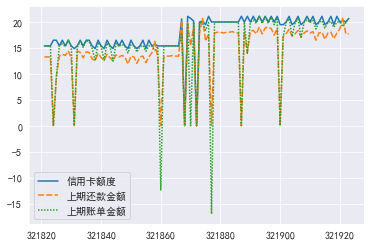

In [26]:
plt.rcParams['axes.unicode_minus']=False 
dd=[temp['信用卡额度'],temp['上期还款金额'], temp["上期账单金额"]]
ax = sns.lineplot(data=dd)
plt.savefig(r"D:/Graduation Design/论文2.0图片/系统_信用卡账单_tkinter", dpi=600, bbox_inches='tight')
plt.show()

In [42]:
#读取银行卡流水记录
fileName_bankTrain = open(r'D:/Python/毕设实验部分/data/datatset/datatset/train/train/bank_detail_train.txt')
bank_data = pd.read_csv(fileName_bankTrain).rename(index=str, columns={"uid":"用户标识", "timespan":"流水时间", "type":"交易类型",
                                                                     "amount":"交易金额", "markup":"工资收入标记"})
# 训练银行流水记录["流水时间"] = 训练银行流水记录["流水时间"] // 86400
bank_data.head()

,用户标识,流水时间,交易类型,交易金额,工资收入标记
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


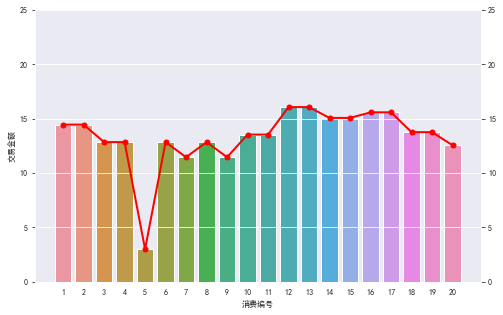

In [49]:
if len(bank_data[bank_data["用户标识"] == 106] > 20):
    x1 = [i for i in range(1, 21, 1)]
    x2 = [i for i in range(0, 20, 1)]
    y1 = bank_data[bank_data["用户标识"] == 106]["交易金额"].tolist()[:20]
    y2 = bank_data[bank_data["用户标识"] == 106]["交易金额"].tolist()[:20]
else:
    x1 = [i for i in range(1, len(bank_data[bank_data["用户标识"] == 106])+1)]
    x2 = [i for i in range(0, len(bank_data[bank_data["用户标识"] == 106]), 1)]
    y1 = bank_data[bank_data["用户标识"] == 106]["交易金额"].tolist()
    y2 = bank_data[bank_data["用户标识"] == 106]["交易金额"].tolist()

# 设置图形大小
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()


# 画柱形图
ax1 = fig.add_subplot(111)
ax1.set_ylim([0, 25])
# ax1.bar(x, y1, alpha=0.7, color='k')
ax1 = sns.barplot(x=x1, y=y1)
ax1.set_ylabel(u'交易金额', fontsize='8')
ax1.set_xlabel(u'消费编号', fontsize='8')
ax1.tick_params(labelsize=8)

# 画折线图
ax2 = ax1.twinx()  # 组合图必须加这个
ax2.set_ylim([0, 25])      
ax2.plot(x2, y2, 'r', ms=5, lw=2, marker='o') # 设置线粗细，节点样式
ax2.tick_params(labelsize=8)

# plt.savefig(r"D:/Graduation Design/论文2.0图片/系统_银行卡流水", dpi=600, bbox_inches='tight')
plt.show()

In [37]:
#读取用户浏览行为
fileName_browseTrain = open(r'D:/Python/毕设实验部分/data/datatset/datatset/train/train/browse_history_train.txt')
beh_data = pd.read_csv(fileName_browseTrain, header=None, 
                       names=["用户标识", "浏览时间", "浏览行为数据", "浏览子行为编号"])
# 训练用户浏览行为["浏览时间"] = 训练用户浏览行为["浏览时间"] // 86400
beh_data.head()

,用户标识,浏览时间,浏览行为数据,浏览子行为编号
0,34801,5926003545,173,1
1,34801,5926003545,164,4
2,34801,5926003545,38,7
3,34801,5926003545,45,1
4,34801,5926003545,110,7


Text(0.5, 0, '浏览行为数据')

D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: Runtim

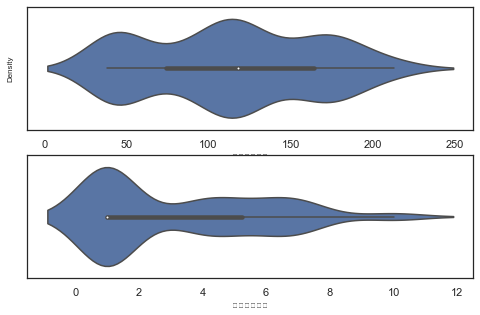

In [62]:
x = beh_data[beh_data["用户标识"] == 41]["浏览行为数据"]
y = beh_data[beh_data["用户标识"] == 41]["浏览子行为编号"]
fig = plt.figure()
plt.rcParams['figure.figsize'] = (8, 5)
# 画柱形图
ax1 = fig.add_subplot(211)# ax1.set_ylim([0, 0.02])
# sns.distplot(x)
sns.violinplot(x=x)
ax1.set_xlabel("浏览行为数据", fontsize=8)
ax1.set_ylabel("Density", fontsize=8)
# ax1.set_title("（a）浏览行为分布", fontsize=10, y=-0.18)

ax2 = fig.add_subplot(212) 
sns.violinplot(x=y)
ax2.set_xlabel("浏览行为数据", fontsize=8)
# ax2.set_title("（b）浏览行为分布", fontsize=10, y=-0.18)
# plt.savefig(r"D:/Graduation Design/论文2.0图片/系统_浏览行为", dpi=600, bbox_inches='tight')

D:\anaconda3\anaconda3_install\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\anaconda3_install\lib\site-packages\matplotlib\backends\backend_agg.py:211: Runtim

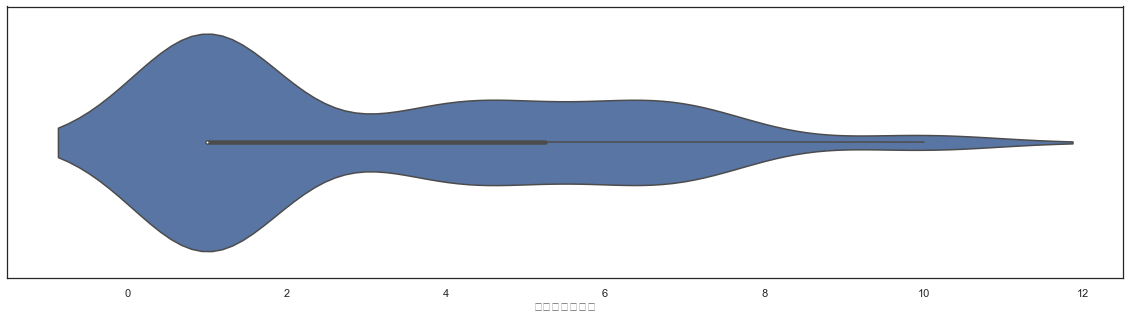

In [51]:
sns.violinplot(y)

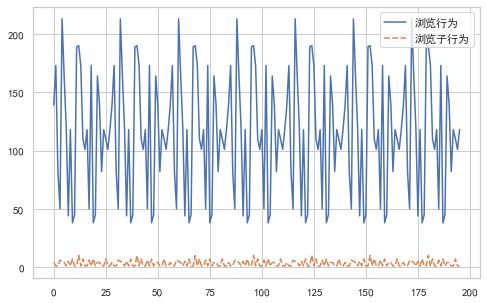

In [65]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']}) 
df = pd.DataFrame()
df["浏览行为"] = x.tolist()
df["浏览子行为"] = y.tolist()
sns.lineplot(data=df)